In [1]:
import time
import torch
import torchvision.utils
from gaze_estimation import (GazeEstimationMethod, create_dataloader,
                             create_logger, create_loss, create_model,
                             create_optimizer, create_scheduler,
                             create_tensorboard_writer)
from gaze_estimation.utils import (AverageMeter, compute_angle_error,
                                   create_train_output_dir, load_config,
                                   save_config, set_seeds, setup_cudnn)
from gaze_estimation.config import get_default_config 
from gaze_estimation.datasets import create_dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cv2
import torch.nn as nn
import torchvision.utils as tvls

d:\conda\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config = get_default_config()
config.merge_from_file('configs/mpiifacegaze/alexnet_train.yaml')
config.freeze()

In [31]:
config.dataset.dataset_dir

'data/MPIIFaceGaze.h5'

In [32]:
import pathlib
dataset_dir = pathlib.Path("data/MPIIFaceGaze.h5")

In [33]:
dataset_dir.exists()

True

In [4]:
train_dataset, val_dataset = create_dataset(config, True, [0,2,3,6,8,9,10,11,12,14])

In [7]:
train_dataset, val_dataset = create_dataset(config, False, [0,2,3,6,8,9,10,11,12,14])

In [14]:
type(train_dataset)

torch.utils.data.dataset.Subset

In [15]:
imgs = []
for j in range(10):
    img = train_dataset[j]
    imgs.append(img[0].unsqueeze(0))
img = torch.concat(imgs)

In [16]:
tvls.save_image(img, f'./result/face_gaze/mpiifacegaze.png', nrow=5)

In [ ]:
train_dataset

In [3]:
images, poses, gazes, ids = create_dataset(config, False, range(15), True)

In [6]:
tvls.save_image(images, 'faces.png')

In [45]:
img = train_dataset[0][0][0,:,:]

In [48]:
img = cv2.resize(train_dataset[0][0][0,:,:].numpy(), (64,64))

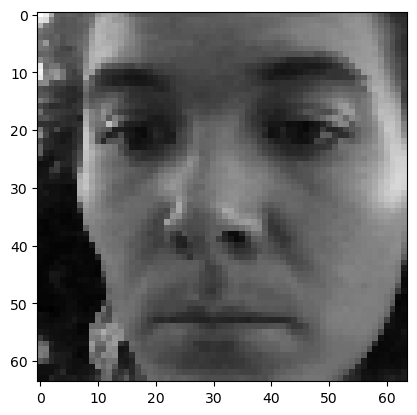

In [49]:
plt.imshow(img, cmap='gray')

In [4]:
train_dataset, val_dataset = create_dataset(config, True, [0,2,3,6,8,9,10,11,12,14])
train_loader = DataLoader(
    train_dataset,
    batch_size=config.train.batch_size,
    shuffle=True,
    num_workers=config.train.train_dataloader.num_workers,
    pin_memory=config.train.train_dataloader.pin_memory,
    drop_last=config.train.train_dataloader.drop_last,
)
val_loader = DataLoader(
    val_dataset,
    batch_size=config.train.batch_size,
    shuffle=False,
    num_workers=config.train.val_dataloader.num_workers,
    pin_memory=config.train.val_dataloader.pin_memory,
    drop_last=False,
)

In [5]:
images, poses, gazes = next(iter(train_loader))

In [12]:
images = images.cuda()
gazes = gazes.cuda()

In [11]:
target_path = "./result/gazeEstimater.zip"
T = torch.load(target_path)
T = nn.DataParallel(T).cuda()

In [13]:
T(images)

d:\conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


tensor([[-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0.0011],
        [-0.1773,  0

In [8]:
import matplotlib.pyplot as plt

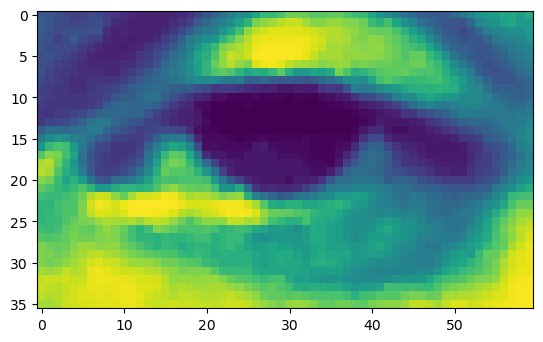

In [9]:
plt.imshow(images[0][0])